__author__ = Steven Carriger,
__version__ = Fall 2022,
__date__ = 26/09/22

#Question 1 

__Description__ = The dataset I have chosen is the World Health Organizations data set. I chose the dataset over others because, the dataset had the data I wanted to look into without having to find another.
The data set has roughly 2600 rows without any modifications and has 14 columns.

__Questions__ = A) Which countries are in the top 5 of producing the most CO2 emissions, which one is the top? 
B) Is there a relationship between the Adult literacy rate and Population annual growth rate, if so, what is the relationship? C) What are the top 5 total income countries, which one was ranked number one?

__link__ = http://www.exploredata.net/Downloads/WHO-Data-Set

In [1]:
#imports and loading of the DataFrame 
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv('WHO.csv')
df

,Country,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),...,Total_CO2_emissions,Total_income,Total_reserves,Trade_balance_goods_and_services,Under_five_mortality_from_CME,Under_five_mortality_from_IHME,Under_five_mortality_rate,Urban_population,Urban_population_growth,Urban_population_pct_of_total
0,Afghanistan,1,1,151.0,28.0,NaN,NaN,NaN,26088.0,4.0,...,692.50,NaN,NaN,NaN,257.00,231.9,257.00,5740436.0,5.44,22.9
1,Albania,2,2,27.0,98.7,6000.0,93.0,94.0,3172.0,0.6,...,3499.12,4.790000e+09,78.14,-2.040000e+09,18.47,15.5,18.47,1431793.9,2.21,45.4
2,Algeria,3,3,6.0,69.9,5940.0,94.0,96.0,33351.0,1.5,...,137535.56,6.970000e+10,351.36,4.700000e+09,40.00,31.2,40.00,20800000.0,2.61,63.3
3,Andorra,4,2,NaN,NaN,NaN,83.0,83.0,74.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,5,3,146.0,67.4,3890.0,49.0,51.0,16557.0,2.8,...,8991.46,1.490000e+10,27.13,9.140000e+09,164.10,242.5,164.10,8578749.0,4.14,53.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Vietnam,198,6,25.0,90.3,2310.0,91.0,96.0,86206.0,1.4,...,101826.23,4.480000e+10,47.11,-1.940000e+09,20.20,23.4,20.20,21900000.0,2.90,26.4
198,West Bank and Gaza,199,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,655.86,3.780000e+09,NaN,NaN,28.00,25.8,28.00,2596216.0,3.33,71.6
199,Yemen,200,1,83.0,54.1,2090.0,65.0,85.0,21732.0,3.0,...,20148.34,1.150000e+10,114.52,8.310000e+08,82.40,87.9,82.40,5759120.5,4.37,27.3
200,Zambia,201,3,161.0,68.0,1140.0,94.0,90.0,11696.0,1.9,...,2366.94,4.090000e+09,10.41,-4.470000e+08,175.30,163.8,175.30,4017411.0,1.95,35.0


In [21]:
#Question 2 data cleaning, selects the columns that are desired for the data frame and then removes any rows with a null value
# No inconsistencies found within data frame after this general cleanup.
rows_before = df.shape[0]
df = df[['Country', 'Adult literacy rate (%)', 'Population annual growth rate (%)', 'Total_CO2_emissions', 'Total_income']]
df = df.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)

if df.Country.dtype != object:
    print('The column title was the data type:', df.Country.dtype)
    df['Country'] = df['Country'].apply(str)
    print('The column Country is now a:', df.Country.dtype)

pd.options.display.float_format = '{:.2f}'.format
    
print('rows before change:', rows_before, '\nrows after change:', df.shape[0], '\nnumber of rows removed:', rows_before - df.shape[0])
df

rows before change: 124 
rows after change: 124 
number of rows removed: 0


,Country,Adult literacy rate (%),Population annual growth rate (%),Total_CO2_emissions,Total_income
1,Albania,98.70,0.60,3499.12,4790000000.00
2,Algeria,69.90,1.50,137535.56,69700000000.00
4,Angola,67.40,2.80,8991.46,14900000000.00
6,Argentina,97.20,1.00,152711.86,314000000000.00
7,Armenia,99.40,-0.30,4345.50,3400000000.00
...,...,...,...,...,...
196,Venezuela,93.00,1.70,148117.20,133000000000.00
197,Vietnam,90.30,1.40,101826.23,44800000000.00
199,Yemen,54.10,3.00,20148.34,11500000000.00
200,Zambia,68.00,1.90,2366.94,4090000000.00


C:\Users\burny\AppData\Local\Temp\ipykernel_14884\1337686455.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries.loc[len(top_countries.index)] = ['Other', '', '', other_countries, '']


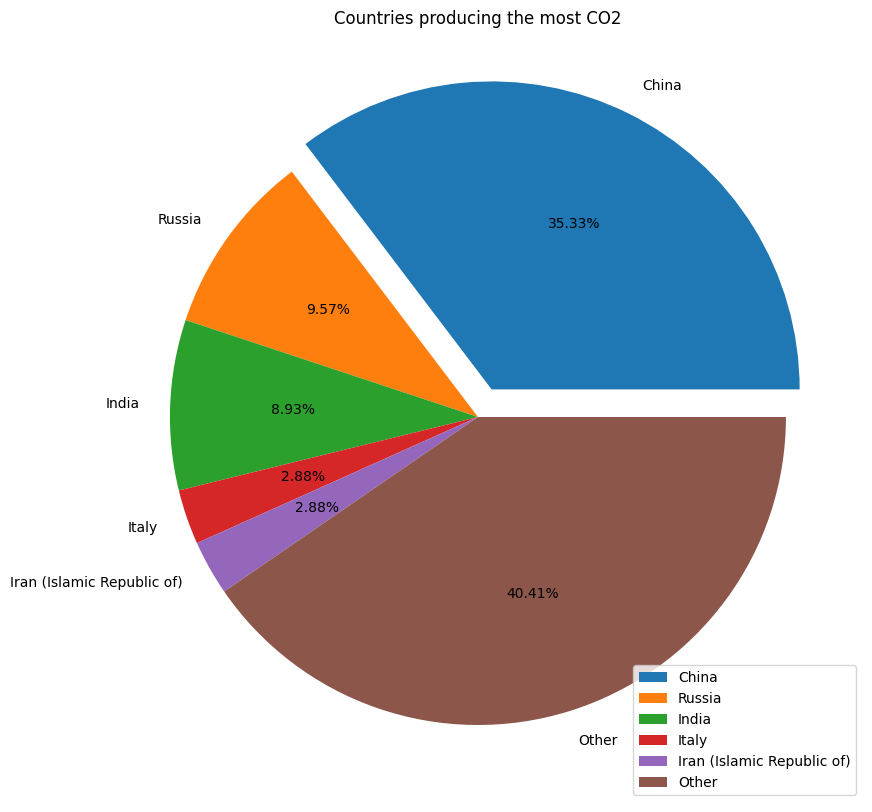

In [22]:
#Question A Finds which countries are in the top 5 of producing the most CO2 emissions and then displays which one is the number one.

sorted_countries = df.sort_values('Total_CO2_emissions', ascending = False)

top_countries = sorted_countries.head(5)
other_countries = df['Total_CO2_emissions'].sum() - top_countries['Total_CO2_emissions'].sum()
top_countries.loc[len(top_countries.index)] = ['Other', '', '', other_countries, '']

plt.figure(figsize=(10, 10))
plt.pie(top_countries.iloc[:, 3], labels = top_countries.iloc[:, 0], autopct = '%.2f%%', explode = [.1,0,0,0,0,0])
plt.title('Countries producing the most CO2')

plt.legend(bbox_to_anchor=(1, 0), loc="lower right")
plt.show()

Question A Cont) The countries that produce the most CO2 are Iran, Italy, India, Russia, and China. China is the number one producer of CO2. As you can see above, I included 'Other' this represents the total amount of CO2 that is produced by ALL of the other countries in the world combined. This means that the top five countries producing CO2 are producing way over half of the world's CO2 emissions.